In [8]:
pip install transformers textblob scikit-learn pandas torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [10]:
pip install nltk

In [33]:
pip install tqdm

In [97]:
import numpy as np
import pandas as pd
import re
import nltk
import tensorflow as tf  # Import TensorFlow
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm  # Import tqdm for progress bar
from nltk.corpus import stopwords
from textblob import TextBlob

# Download required nltk data
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [98]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv("/content/sample_data/twitter_dataset.csv")

# Display the first few rows of the dataset
print(dataset.head())


   id  Tweet_ID          Username  \
0   1      9954           wmoreno   
1   2      3851        waltonsara   
2   3      4963             amy49   
3   4      3887            paul09   
4   5      5438  johnstonmichelle   

                                                Text  Retweets  Likes  \
0  Factor enjoy property world main despite. Grow...        61      6   
1  Television sure when others water hold. Value ...        11     18   
2  In structure there trip professional any him. ...        71     91   
3  Walk method city all statement then check. Ana...         5     31   
4  Single bed cover if nearly. Let feeling side.\...        46     58   

             Timestamp  
0  2023-04-14 05:33:28  
1  2023-04-09 19:09:27  
2  2023-05-09 20:12:28  
3  2023-01-16 10:57:45  
4  2023-05-08 22:24:11  


In [16]:
# Initialize the necessary tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Normalize the text to lowercase
    text = text.lower()

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Perform stemming and lemmatization
    words = [stemmer.stem(word) for word in words]
    words = [lemmatizer.lemmatize(word) for word in words]

    # Rejoin words into a single string
    cleaned_text = ' '.join(words)

    return cleaned_text

# Apply preprocessing to the dataset
df['cleaned_text'] = df['Text'].apply(preprocess_text)

df = df.drop(columns=['id', 'Tweet_ID', 'Username', 'Retweets', 'Likes'])

In [99]:
# Display the first few rows to verify
print(df.head())

                                                Text            Timestamp  \
0  Factor enjoy property world main despite. Grow...  2023-04-14 05:33:28   
1  Television sure when others water hold. Value ...  2023-04-09 19:09:27   
2  In structure there trip professional any him. ...  2023-05-09 20:12:28   
3  Walk method city all statement then check. Ana...  2023-01-16 10:57:45   
4  Single bed cover if nearly. Let feeling side.\...  2023-05-08 22:24:11   

                                        cleaned_text  label  
0  factor enjoy properti world main despit grow w...      1  
1  televis sure other water hold valu economi men...      2  
2  structur trip profession offer chair break cle...      0  
3  walk method citi statement check analysi child...      1  
4  singl bed cover nearli let feel side doctor ch...      2  


In [100]:
# Generate sentiment labels with TextBlob
def get_sentiment_label(text):
    # Use TextBlob to calculate sentiment polarity
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    # Assign sentiment based on polarity score
    if polarity > 0.1:
        return 2  # Positive
    elif polarity < -0.1:
        return 0  # Negative
    else:
        return 1  # Neutral

# Apply the sentiment labeling function
df['label'] = df['cleaned_text'].apply(get_sentiment_label)

# Display the first few rows to verify the labels
print(df.head())


                                                Text            Timestamp  \
0  Factor enjoy property world main despite. Grow...  2023-04-14 05:33:28   
1  Television sure when others water hold. Value ...  2023-04-09 19:09:27   
2  In structure there trip professional any him. ...  2023-05-09 20:12:28   
3  Walk method city all statement then check. Ana...  2023-01-16 10:57:45   
4  Single bed cover if nearly. Let feeling side.\...  2023-05-08 22:24:11   

                                        cleaned_text  label  
0  factor enjoy properti world main despit grow w...      1  
1  televis sure other water hold valu economi men...      2  
2  structur trip profession offer chair break cle...      0  
3  walk method citi statement check analysi child...      1  
4  singl bed cover nearli let feel side doctor ch...      2  


In [101]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)


In [102]:
# TF-IDF Vectorization for Logistic Regression and SVM
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [103]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Train the model on the full training set
log_reg.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_tfidf)

# SVM
svm_model = SVC(kernel='linear', probability=True)

# Train the model on the full training set
svm_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)


In [88]:
# Tokenization and Padding
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
X = pad_sequences(sequences, maxlen=max_len)
y = to_categorical(df['label'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [89]:
# Build the CNN-LSTM Model
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [90]:
# Custom callback for tqdm progress bar
class TQDMProgressCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_progress = tqdm(total=len(X_train), desc=f"Epoch {epoch+1}/{self.params['epochs']}")

    def on_batch_end(self, batch, logs=None):
        self.epoch_progress.update(X_train.shape[0])

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_progress.close()

# Train the model with progress bar
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=0, callbacks=[TQDMProgressCallback()])


Epoch 1/5: 360000it [00:13, 26334.72it/s]
Epoch 2/5: 360000it [00:14, 24715.86it/s]
Epoch 3/5: 360000it [00:07, 51309.48it/s]
Epoch 4/5: 360000it [00:05, 67329.04it/s]
Epoch 5/5: 360000it [00:06, 52078.13it/s]


In [91]:
# Evaluate the model
y_pred = model.predict(X_test, batch_size=64, verbose=2)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


19/19 - 1s - 44ms/step


In [104]:
# Evaluate Logistic Regression Model
print("\nLogistic Regression Evaluation on Test Set:")
print(classification_report(y_test, y_pred_log_reg, target_names=['negative', 'neutral', 'positive']))
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_log_reg))

# Evaluate SVM Model
print("\nSVM Evaluation on Test Set:")
print(classification_report(y_test, y_pred_svm, target_names=['negative', 'neutral', 'positive']))
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_svm))

print("\nCNN-LSTM Hybrid Model Evaluation on Test Set:")
print(classification_report(y_true, y_pred_classes, target_names=['negative', 'neutral', 'positive']))
print("Accuracy on Test Set:", accuracy_score(y_true, y_pred_classes))


Logistic Regression Evaluation on Test Set:
              precision    recall  f1-score   support

    negative       0.74      0.15      0.25       135
     neutral       0.69      0.80      0.74       547
    positive       0.80      0.84      0.82       518

    accuracy                           0.74      1200
   macro avg       0.74      0.60      0.60      1200
weighted avg       0.74      0.74      0.72      1200

Accuracy on Test Set: 0.7425

SVM Evaluation on Test Set:
              precision    recall  f1-score   support

    negative       0.77      0.32      0.45       135
     neutral       0.73      0.89      0.80       547
    positive       0.89      0.83      0.86       518

    accuracy                           0.80      1200
   macro avg       0.80      0.68      0.70      1200
weighted avg       0.81      0.80      0.79      1200

Accuracy on Test Set: 0.7983333333333333

CNN-LSTM Hybrid Model Evaluation on Test Set:
              precision    recall  f1-score   s

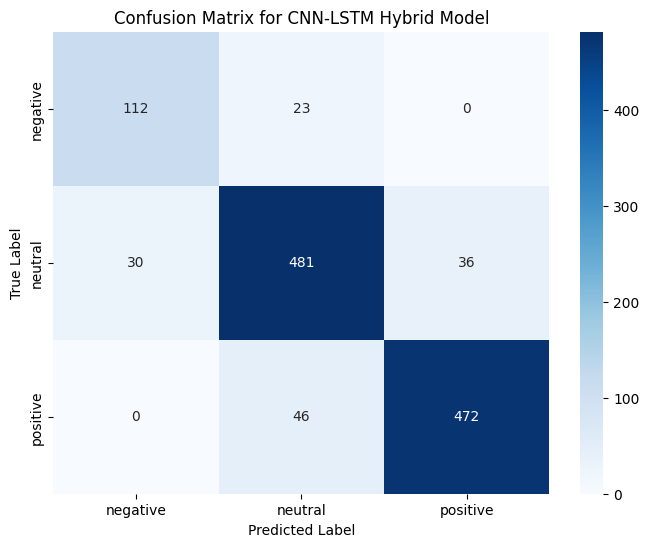

In [119]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CNN-LSTM Hybrid Model')
plt.show()


In [136]:
import pandas as pd
# Calculate evaluation metrics for each model
from sklearn.metrics import precision_score, recall_score, f1_score

# Logistic Regression
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg, average='weighted')
log_reg_recall = recall_score(y_test, y_pred_log_reg, average='weighted')
log_reg_f1 = f1_score(y_test, y_pred_log_reg, average='weighted')

# SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

# CNN-LSTM
cnn_lstm_accuracy = accuracy_score(y_true, y_pred_classes)
cnn_lstm_precision = precision_score(y_true, y_pred_classes, average='weighted')
cnn_lstm_recall = recall_score(y_true, y_pred_classes, average='weighted')
cnn_lstm_f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'CNN-LSTM'],
    'Accuracy': [log_reg_accuracy, svm_accuracy, cnn_lstm_accuracy],
    'Precision': [log_reg_precision, svm_precision, cnn_lstm_precision],
    'Recall': [log_reg_recall, svm_recall, cnn_lstm_recall],
    'F1-Score': [log_reg_f1, svm_f1, cnn_lstm_f1]
})

print(comparison_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.742500   0.744411  0.742500  0.719393
1                  SVM  0.798333   0.805823  0.798333  0.787638
2             CNN-LSTM  0.887500   0.888455  0.887500  0.887879


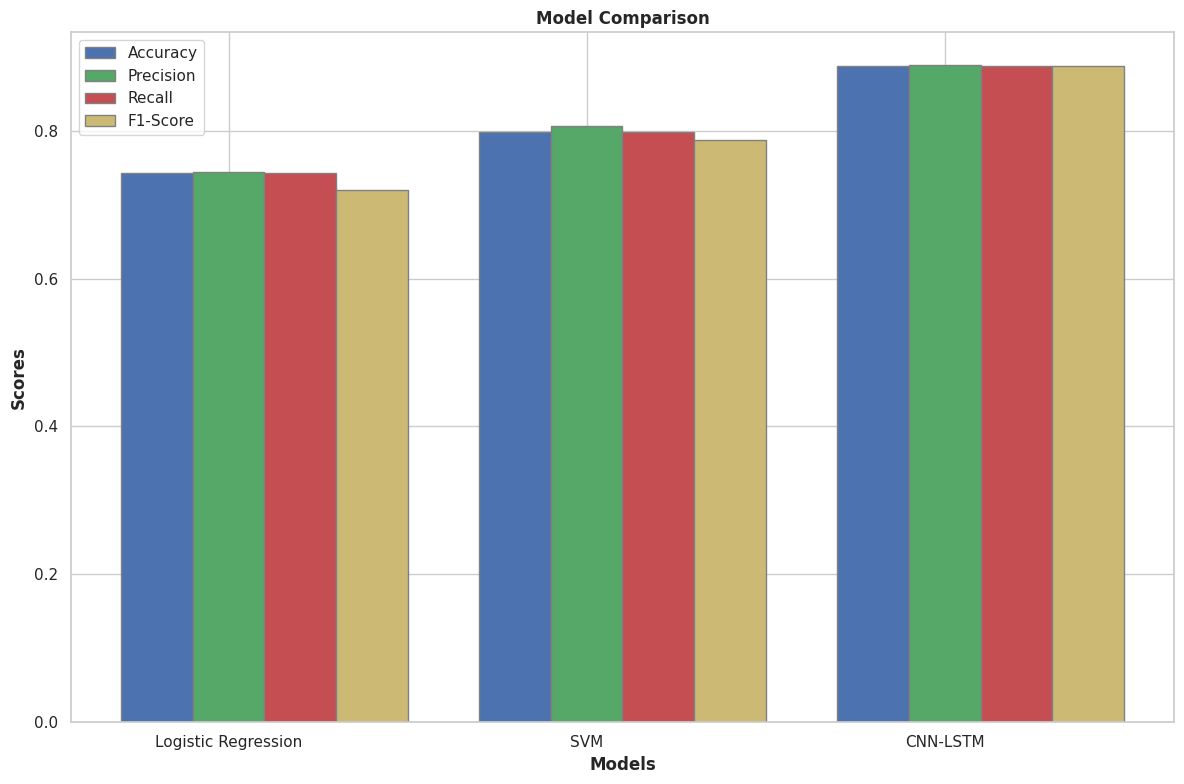

In [135]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the comparison DataFrame
models = comparison_df['Model']
accuracy = comparison_df['Accuracy']
precision = comparison_df['Precision']
recall = comparison_df['Recall']
f1_score = comparison_df['F1-Score']

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_score, color='y', width=bar_width, edgecolor='grey', label='F1-Score')

# Add labels, title, and legend
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Model Comparison', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

      Class     Metric  Logistic Regression       SVM  CNN-LSTM
0  negative  Precision             0.740741  0.767857  0.788732
1  negative     Recall             0.148148  0.318519  0.829630
2  negative   F1-Score             0.246914  0.450262  0.808664
3   neutral  Precision             0.692675  0.731928  0.874545
4   neutral     Recall             0.795247  0.888483  0.879342
5   neutral   F1-Score             0.740426  0.802642  0.876937
6  positive  Precision             0.800000  0.893750  0.929134
7  positive     Recall             0.841699  0.828185  0.911197
8  positive   F1-Score             0.820320  0.859719  0.920078


<ipython-input-139-fb2d751b532a>:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Class', y='Score', hue='Model', data=melted_df, ci=None)


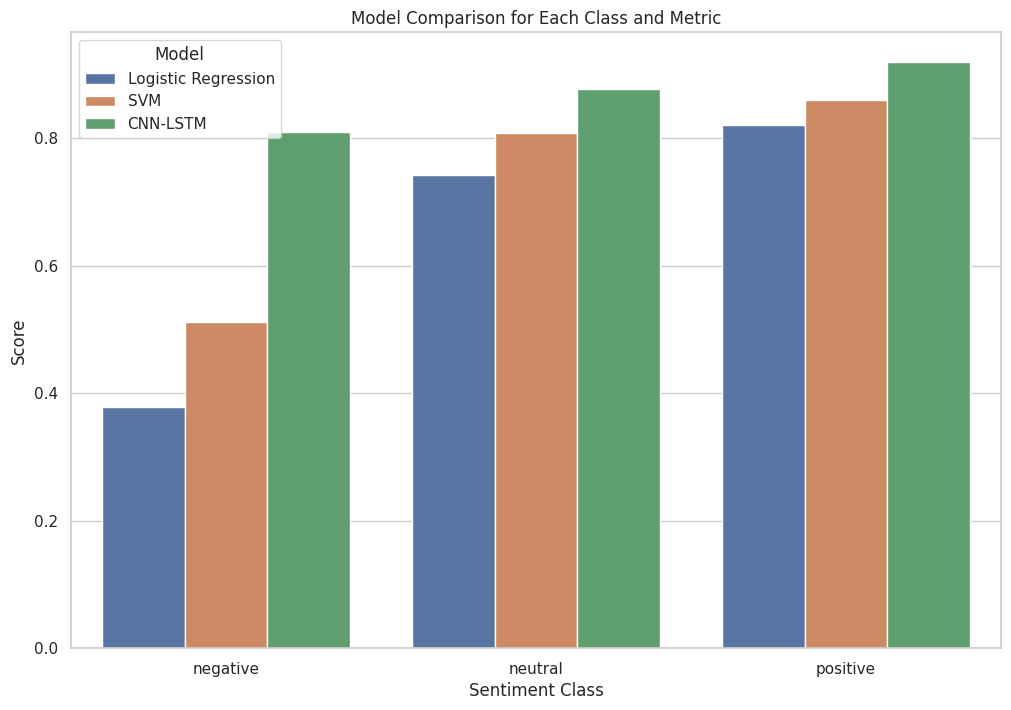

In [139]:
# prompt: create comparison of all models on the postive negative and neutral

import pandas as pd
import numpy as np
# Calculate precision, recall, and F1-score for each class and model
def evaluate_for_class(y_true, y_pred, class_label):
    true_positives = np.sum((y_true == class_label) & (y_pred == class_label))
    false_positives = np.sum((y_true != class_label) & (y_pred == class_label))
    false_negatives = np.sum((y_true == class_label) & (y_pred != class_label))

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

# Evaluate for each class
classes = ['negative', 'neutral', 'positive']
results = []
for class_label, class_name in enumerate(classes):
    log_reg_precision, log_reg_recall, log_reg_f1 = evaluate_for_class(y_test, y_pred_log_reg, class_label)
    svm_precision, svm_recall, svm_f1 = evaluate_for_class(y_test, y_pred_svm, class_label)
    cnn_lstm_precision, cnn_lstm_recall, cnn_lstm_f1 = evaluate_for_class(y_true, y_pred_classes, class_label)

    results.append({
        'Class': class_name,
        'Metric': 'Precision',
        'Logistic Regression': log_reg_precision,
        'SVM': svm_precision,
        'CNN-LSTM': cnn_lstm_precision
    })
    results.append({
        'Class': class_name,
        'Metric': 'Recall',
        'Logistic Regression': log_reg_recall,
        'SVM': svm_recall,
        'CNN-LSTM': cnn_lstm_recall
    })
    results.append({
        'Class': class_name,
        'Metric': 'F1-Score',
        'Logistic Regression': log_reg_f1,
        'SVM': svm_f1,
        'CNN-LSTM': cnn_lstm_f1
    })

# Create a DataFrame for comparison
comparison_df_detailed = pd.DataFrame(results)

# Display the detailed comparison
print(comparison_df_detailed)

# Plotting the results
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame for easier plotting
melted_df = comparison_df_detailed.melt(id_vars=['Class', 'Metric'], var_name='Model', value_name='Score')

# Create a grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Class', y='Score', hue='Model', data=melted_df, ci=None)
plt.title('Model Comparison for Each Class and Metric')
plt.xlabel('Sentiment Class')
plt.ylabel('Score')
plt.legend(title='Model')
plt.show()
